In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.io import loadmat
import random
import pandas as pd


# Question 3.a
- Vertical accelerations are dominant in artificially induced Earthquakes ()
- Pushover method focuses on lateral excitation of the structure
- Especially relevant for structures whose stiffness relies on self-weight (i.e. a masonry structure with roof)
- Artificially induced earthquakes are characterized by high-energy release at higher frequencies, especially along the vertical direction > important for short-period structures 

In [ ]:
# Defining parameters

student_number = 5381827
student_number = list(str(student_number))
for i in range(len(student_number)):
    student_number[i] = int(student_number[i])
A, B, C, D, E, F, G = student_number


g = 9.81                    # Gravitational acceleration [m/s^2]
xi = 0.040 + C * 1e-3        # Damping ratio []
PGA = (0.33 + D * 1e-2)      # Peak ground acceleration [g]
gamma = 1.4                  # Importance factor [] - Importance class IV (assigned) corresponds to gamma=1.4 according to EN1998-1-1 (par 4.2.5)
a_g_ref = PGA*gamma
a_vg_ref = a_g_ref*0.45      #  - Type 2 Earthquake (M_s = 5.0, assigned parameter)

1.4074738247489391


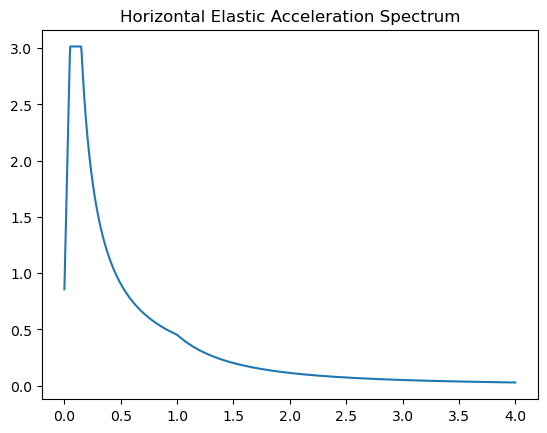

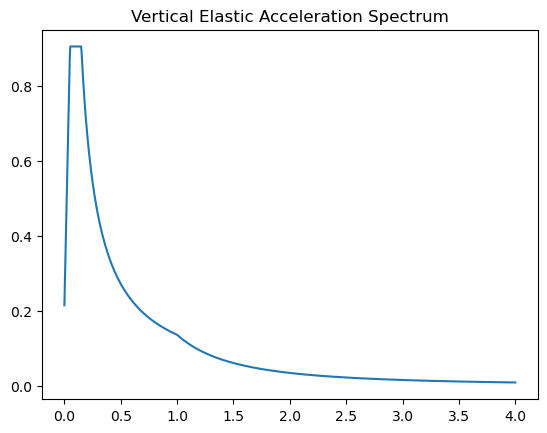

In [ ]:
eta = np.sqrt(10/(5+xi))
print(eta) #Add eta check
S = 1.8
TB = 0.10
TC = 0.30
TD = 1.2
def horizontal_elastic_acc_spectrum(T, eta):
 Se_T_values = []
 for T in T:
   if 0 <= T <= TB:
      Se_T = a_g_ref * S * (1 + (T / TB) * (eta * 2.5 - 1))
      Se_T_values.append(Se_T)
   elif TB < T <= TC:
      Se_T = a_g_ref * S * eta * 2.5
      Se_T_values.append(Se_T)
   elif TC < T <= TD:
      Se_T = a_g_ref * S * eta * 2.5 * (TC / T)
      Se_T_values.append(Se_T)
   elif TD < T <= 4.0:
      Se_T = a_g_ref * S * eta * 2.5 * (TC * TD) / (T ** 2)
      Se_T_values.append(Se_T)
   else:
      Se_T = 0  # Or raise an exception or handle out-of-range T
      Se_T_values.append(Se_T)
 return Se_T_values


TB = 0.05 
TC = 0.15
TD = 1.0

def vertical_elastic_acceleration_response_spectrum(T, eta):
  Svd_T_values = []
  for T in T: 
      if 0 <= T <= TB:
           Svd_T = a_vg_ref * (1 + (T / TB) * (eta * 3.0 - 1))
           Svd_T_values.append(Svd_T)
      elif TB < T <= TC:
          Svd_T = a_vg_ref * eta * 3.0
          Svd_T_values.append(Svd_T)
      elif TC < T <= TD:
          Svd_T = a_vg_ref * eta * 3.0 * (TC / T)
          Svd_T_values.append(Svd_T)
      elif TD < T:
          Svd_T = a_vg_ref * eta * 3.0 * (TC * TD) / (T ** 2)
          Svd_T_values.append(Svd_T)
      else:
          Svd_T = 0  # Or handle as out-of-rang
          Svd_T_values.append(Svd_T)
  return Svd_T_values


T = np.linspace(0,4,1000)

plt.plot(T,horizontal_elastic_acc_spectrum(T,eta))
plt.title("Horizontal Elastic Acceleration Spectrum")
plt.show()

plt.plot(T,vertical_elastic_acceleration_response_spectrum(T,eta))
plt.title("Vertical Elastic Acceleration Spectrum")
plt.show()

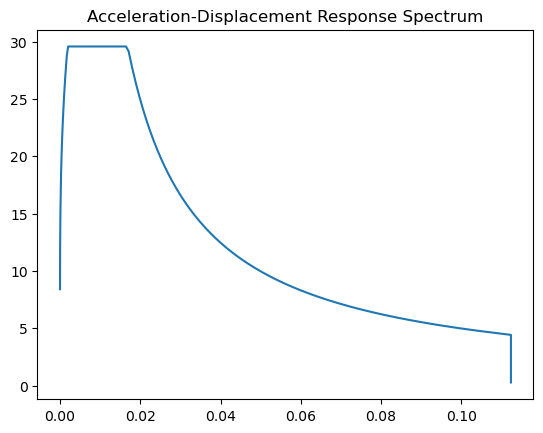

In [12]:
# Acceleration-Displacement Response Spectrum

S_a_hor_ms = g*np.array(horizontal_elastic_acc_spectrum(T, eta))
S_d_hor_ms = [T[i]**2*S_a_hor_ms[i]/(4*np.pi**2) for i in range(len(T))]

plt.plot(S_d_hor_ms,S_a_hor_ms)
plt.title("Acceleration-Displacement Response Spectrum")
plt.show()